In [87]:
# remember to load the environment first by running `conda activate colombia-python2`
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
#These lat and longs were looked up online, the cities that samples came from are known from the surveillance data.
city_lat_long_dict = {
    'cali':{'latitude': 3.395397, 'longitude': -76.6657535},
    'monteria':{'latitude': 8.7606317, 'longitude': -75.9169898},
    'ibague':{'latitude': 4.4788663, 'longitude': -75.5238119},
    'belen_de_umbria':{'latitude': 5.2009136, 'longitude': -75.873638},
    'pitalito':{'latitude': 1.8530233, 'longitude': -76.0724286},
                     }

In [88]:
# turn the lats and longs into simple lists for matplotlib plotting
lats = [city_lat_long_dict[key]['latitude'] for key in city_lat_long_dict.keys()]
longs = [city_lat_long_dict[key]['longitude'] for key in city_lat_long_dict.keys()]

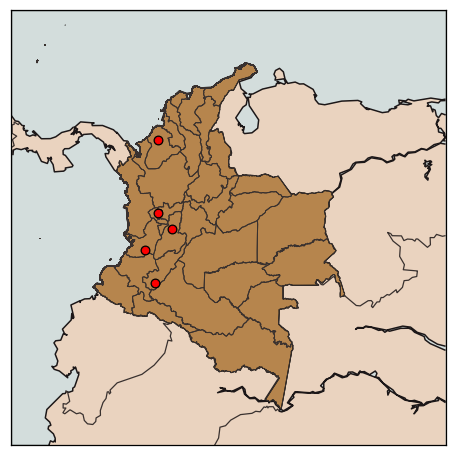

In [86]:
#map plotting time
fig,ax1 = plt.subplots(figsize=(8, 8),facecolor='w')

# bound the portion of the earth that I want to look at with lats and longs for lower left corner and upper right corner
# use low resolution ('l') when scripting so doesn't take a million years to plot. Turn it up higher for manuscript quality fig
# set ax for point scatter.
colombia_map = Basemap(llcrnrlat=-6,urcrnrlat=15,llcrnrlon=-83,urcrnrlon=-62,resolution='l', ax=ax1)
colombia_map.drawmapboundary(fill_color='#D3DDDC', linewidth=1.25) #fill in the ocean, and add box around the map figure
colombia_map.drawcoastlines(color='#1C1718', linewidth=1.5) #draw the coastlines
colombia_map.drawcountries(color='#39312F',linewidth=1.25) #draw the country borders
colombia_map.fillcontinents(color ='#EAD3BF') #fill in the landmass color

# make a polygon path for Colombia as a whole so it can be colored differently (0 in shape files references administrative level 0 , or country boundaries)
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_0','country',drawbounds=False)#read in Colombian departmental boundaries from shapefiles
patches = [Polygon(np.array(shape)) for shape in colombia_map.country]  
ax1.add_collection(PatchCollection(patches, facecolor= '#B6854D', edgecolor='k', linewidths=1., zorder=2))

# add the departmental boundaries, 1 in shapefile references administrative level 1.
colombia_map.readshapefile('./gadm36_COL_shp/gadm36_COL_1','departments',color='#39312F', linewidth=1)#read in Colombian departmental boundaries from shapefiles

#add sampling locations to the map given lats and longs of the cities coded above
ax1.scatter(x=longs, y=lats, c='black', alpha=1, zorder=9, marker='o',s=80)
ax1.scatter(x=longs, y=lats, c='#FF0000', alpha=1, zorder=10, marker='o',s=40)

plt.savefig('../manuscript/figures/genome-locations-figure1.png')
plt.savefig('../manuscript/figures/genome-locations-figure1.pdf')